<a href="https://colab.research.google.com/github/Yayadark/Simple-PyTorch-AI-Model/blob/main/PyTorchModeling1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: xlabel='wt', ylabel='mpg'>

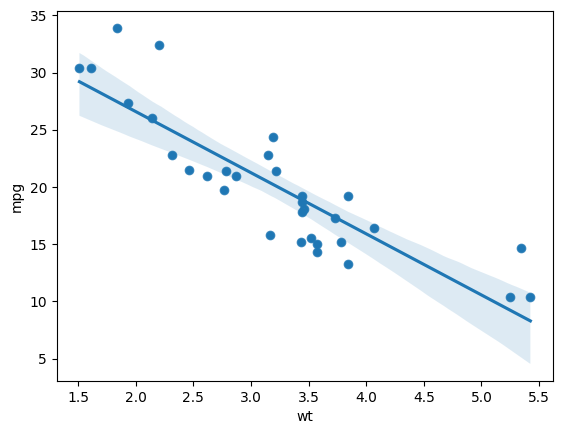

In [1]:
#%% packages
import graphlib
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import seaborn as sns

#%% data import
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

#%% visualise the model
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)


In [2]:
#%% convert data to tensor
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

#%% Dataset and Dataloader
class LinearRegressionDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(dataset = LinearRegressionDataset(X_np, y_np), batch_size=2)



In [3]:
#%% Model
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)


input_dim = 1
output_dim = 1
model = LinearRegressionTorch(input_size=input_dim, output_size=output_dim)
model.train()

# %% Mean Squared Error
loss_fun = nn.MSELoss()

#%% Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [4]:



#%% perform training
losses = []
slope, bias = [], []
number_epochs = 1000
for epoch in range(number_epochs):
    for j, data in enumerate(train_loader):
        # optimization
        optimizer.zero_grad()

        # forward pass
        y_hat = model(data[0])

        # compute loss
        loss = loss_fun(y_hat, data[1])
        losses.append(loss.item())

        # backprop
        loss.backward()

        # update weights
        optimizer.step()

    # get parameters
    for name, param in model.named_parameters():
        if param.requires_grad:
            if name == 'linear.weight':
                slope.append(param.data.numpy()[0][0])
            if name == 'linear.bias':
                bias.append(param.data.numpy()[0])


    # store loss
    losses.append(float(loss.data))
    # print loss
    if (epoch % 100 == 0):
        print(f"Epoch {epoch}, Loss: {loss.data}")



Epoch 0, Loss: 35.787620544433594
Epoch 100, Loss: 1.5687618255615234
Epoch 200, Loss: 1.4115431308746338
Epoch 300, Loss: 1.4094297885894775
Epoch 400, Loss: 1.409427285194397
Epoch 500, Loss: 1.409427285194397
Epoch 600, Loss: 1.409427285194397
Epoch 700, Loss: 1.409427285194397
Epoch 800, Loss: 1.409427285194397
Epoch 900, Loss: 1.409427285194397


In [5]:
# %% model state dict
#model.state_dict()
# %% save model state dict
#torch.save(model.state_dict(), 'model_state_dict.pth')



In [6]:

# %% load a model
#model = LinearRegressionTorch(input_size=input_dim, output_size=output_dim)
# model.state_dict()  # randomly initialized
#model.load_state_dict(torch.load('model_state_dict.pth'))
#model.state_dict()
# %%

<Axes: >

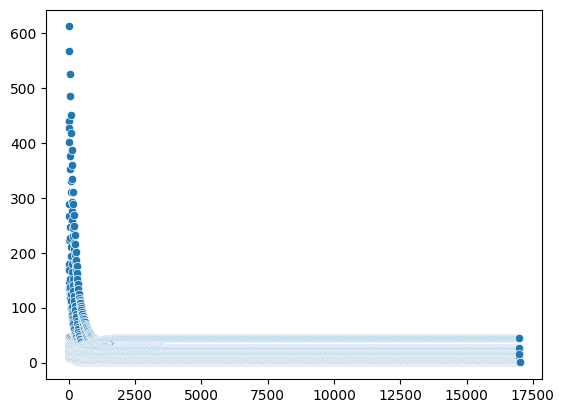

In [7]:
# %% visualise model training
sns.scatterplot(x=range(len(losses)), y=losses)

<Axes: >

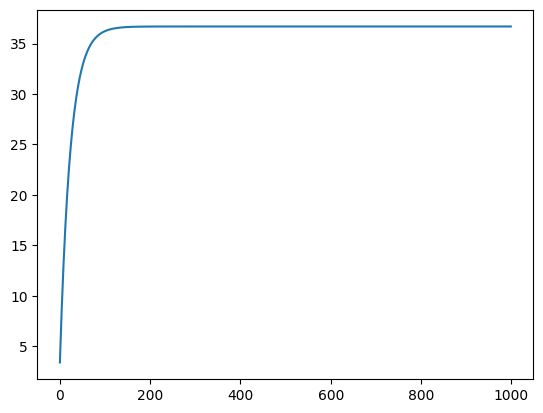

In [8]:
#%% visualise the bias development
sns.lineplot(x=range(len(bias)), y=bias)

<Axes: >

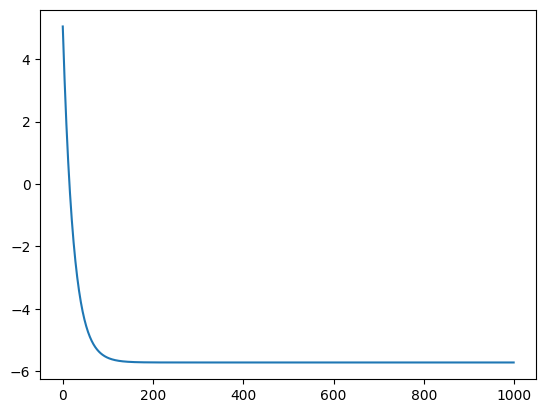

In [9]:
#%% visualise the slope development
sns.lineplot(x=range(len(slope)), y=slope)


<Axes: >

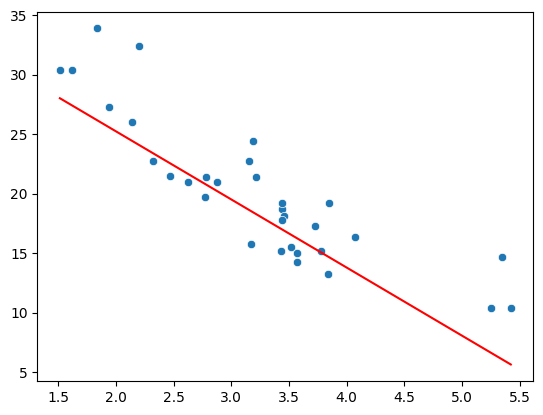

In [10]:
# %% check the result
model.eval()
y_pred = [i[0] for i in model(X).data.numpy()]
y = [i[0] for i in y_true.data.numpy()]
sns.scatterplot(x=X_list, y=y)
sns.lineplot(x=X_list, y=y_pred, color='red')
# %%

# %%